# Tennis - Report

This notebook contains the report for project 3 of the Udacity Deep RL Nanodegree - Multi-Agent Tennis. This notebook contains the following sections:
Introduction, Learning Algorithm - DDPG, Results, Ideas for improvement

## Introduction
In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1. If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01. Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Each agent receives its own, local observation. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping.

The environment is solved when the agent achieves an average score of +0.5 (over 100 consecutive episodes, after taking the maximum over both agents).

Trained agent playing tennis


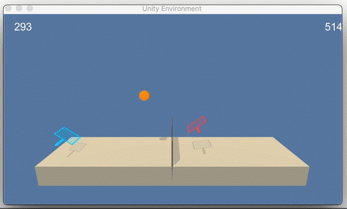

In [4]:
print("Fig 1. Trained agent playing tennis")
from IPython.display import Image
Image(filename='trained_tennis_gif.gif') 

## Learning Algorithm - DDPG

DDPG stands for Deep Deterministic Policy Gradients, presented in 2015 in “Continuous Control With Deep Reinforcement Learning” (Lillicrap et al, 2015). DDPG builds on the actor-critic framework but differentiates itself by directly outputting action values instead of a probability distribution across discrete values. DPPG uses four networks, and therefore four sets of parameters to train: a Q network, a target Q network, deterministic policy function, and target policy network. Like DQN, the target networks are copies of their corresponding networks in a time-delayed fashion. The reasons for this are explored in DQN papers, but in short, this increases stability. 


Learning process
In this section, I will put the pseudocode and learning process in my own words to demonstrate an understanding of the DDPG algorithm. We start the process by initializing our four networks (critic, actor, target critic, target actor) and our replay buffer. Then we begin our training. For each episode we want to train, at t=0, we initialize the state (to start again with a new environment). Then for each time step, we select an action based on the current policy and exploration policy. In practice, we get an action from the actor network and add noise to it. Then we perform the action in the environment, observe the reward, and new state of the environment (now we have s,a,r,s'). We store this experience (s,a,r,s') in our memory buffer. Depending on the training policy, we may sample a minibatch from this buffer and calculate an updated Q value. The updated Q-value is obtained by the Bellman Equation but we use the target value network to calculate the next state Q value and the target policy network to get the next action value.

On top of this standard DDPG implementation, I made some additional modifications:

**Epsilon Decay on Actions**
By visualizing failed trainings, I saw that my agents behaved in the same way no matter where the ball was and this resulted in very short episodes where the ball immediately fell. My hypothesis for this was that the agent was stuck in a local minima very early - maybe I was also overtraining. To counteract this, I wanted to encourage more exploration so I also added random actions and used an epsilon decay to encourage more upfront exploration. I think this along with the decaying learning rate made a big difference to training.

**Decaying Learning Rate**
Through experimentation, I found that a high learning rate in early episodes was yielding really good results in improving the score rapidly. Moreover, at a low learning rate, the score failed to pick up so the high learning rate was almost crucial with the hyper parameter sets that I tried. However, the learning rate was not sustainable and my agent stopped learning before solving the environment. To deal with this, I implemented a very direct solution - decaying the learning rate during training. Whilst most implementations I found online seem to decay the learning rate by a tenth each decay instance, I thought this was too aggressive and damped it to 0.8. For future projects, I would like to do more research into why a tenth seems to be the convention.

**Epsilon Decay on Noise**
I am not sure if this made any difference, to be completely honest, but in early implementations it was not clear that the model was training. Through research I saw that some other implementations used an epsilon decay on the noise to decrease the exploration as training went on. I left it in there as it did not seem to *hurt* results... I did not do things in the best way and played with multiple hyperparameters at the same time, so I cannot pinpoint precisely if decaying the noise was a positive influence or not.


### This implementation
**Actor network**
* Fully connected layer 1 - 400 nodes
* Fully connected layer 2 - 300 nodes

**Critic network**
* Fully connected layer 1 - 400 nodes
* Fully connected layer 2 - 300 nodes


**Hyperparameters**
* Batch size 128
* Gamma 0.99
* Tau 1e-3
* Actor learning rate 1e-3 (note that this decayed)
* Actor learning rate minimum 1e-4 (floor for how much it decayed)
* Critic learning rate 1e-3 (note that this decayed)
* Critic learning rate minimum 1e-4 (floor for how much it decayed)
* Learn every 1 step
* Learn 16 minibatches per learning step
* OU sigma 0.2
* OU theta 0.15
* Epsilon decay for noise process 1e-6



## Results
The above implementation and set of hyper parameters solved the tennis environment in 805 episodes! I was pretty happy with this.

Fig 2. Score during training


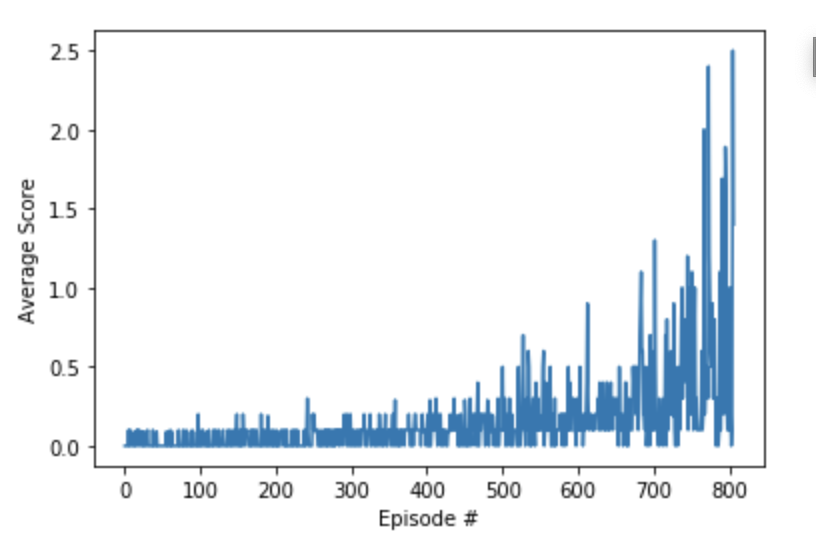

In [8]:
print("Fig 2. Score during training")
from IPython.display import Image
Image(filename='scores_tennis.png', width=400) 

## Ideas for improvement
**AlphaZero**
The AlphaZero case study was very interesting and I would love to try their approach on this environment.

**Less is more** 
I feel like I added too many things into the pot on this one with all the different decaying things. I don't know if this was a good or bad implementation or if I'm just getting comfortable with experimentation but it didn't feel as elegant as a 'clean' implementation. That being said, keeping it simple didn't help me solve the problem so I'm not sure what else I would have done. Maybe I should have worked harder at tuning the hyperparameters? As a further step, I would like to systematically run experiments with the additions I made to DDPG to quantify their impact and better inform my future use of these techniques.